In [74]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
df = load_diabetes()
data_x = df.data
print(data_x.shape)
data_y = df.target
print(data_y.shape)
print("Number of nan's in dataset:",np.sum(np.isnan(data_x)))

(442, 10)
(442,)
Number of nan's in dataset: 0


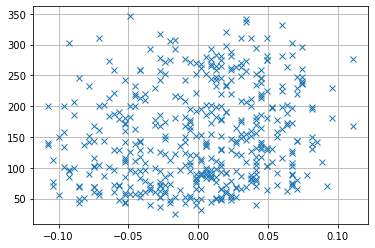

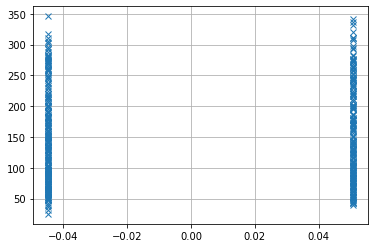

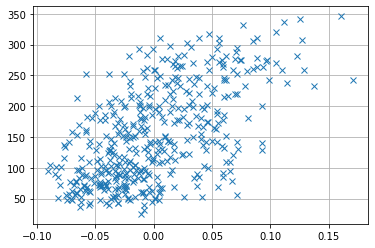

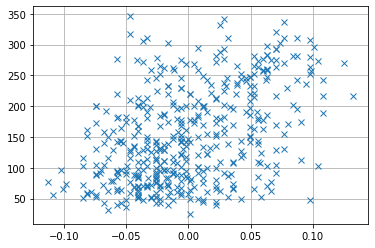

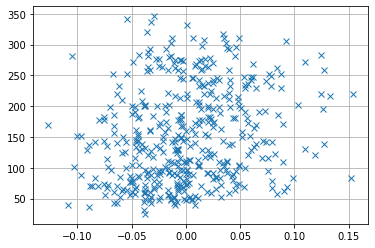

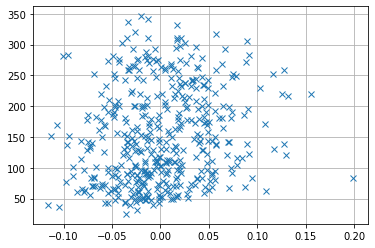

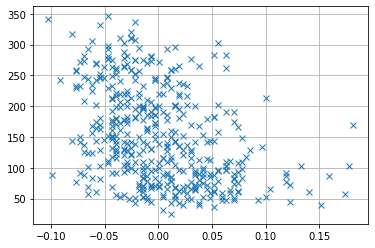

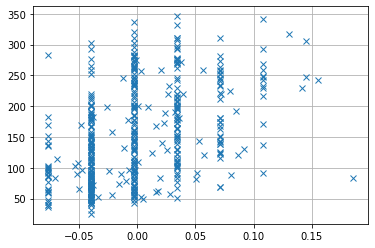

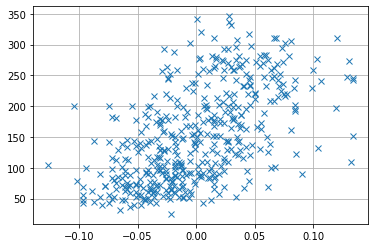

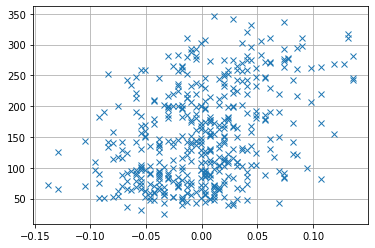

In [36]:
#visualize data
for i in range(data_x.shape[1]):
    plt.plot(data_x[:,i],data_y,'x')
    plt.grid()
    plt.show()

In [37]:
#split the dataset into train and test (test = 0.3)
y_train = data_y[:300,]
y_test = data_y[300:,]

X_train = data_x[:300,:(data_x.shape[1])]
X_test= data_x[300:,:(data_x.shape[1])]
#scale features X_train[0,1] because the algorithms computes distance
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)


In [43]:
#Run the Ordinary Least Squares regression
olsr = linear_model.LinearRegression()
acc_scores = cross_val_score(olsr, X_train, y_train, cv=10)
print("Train Accuracy: %0.2f (+/- %0.2f)" % (acc_scores.mean(), acc_scores.std() * 2))
mse_train_olsr = cross_val_score(olsr, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print("Mean Ordinary Least Squares regression Train MSE: %f (%f)" %(-np.mean(mse_train_olsr),np.std(mse_train_olsr)))


Train Accuracy: 0.42 (+/- 0.36)
Mean Ordinary Least Squares regression Train MSE: 3126.318936 (336.909960)


In [45]:
#For Ridge Regression with Cross Validation

alphas = 10**np.linspace(10,-2,100)*0.01 #generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print("Best alpha: %f" %ridgecv.alpha_)
ridge = linear_model.Ridge(alpha=ridgecv.alpha_)
mse_train_ridge =cross_val_score(ridge, X_train, y_train, cv=10,scoring = 'neg_mean_squared_error')
print("Mean Ridge Train MSE: %f (%f)" %(-np.mean(mse_train_ridge),np.std(mse_train_ridge)))

Best alpha: 0.081113
Mean Ridge Train MSE: 3168.621686 (752.167991)


In [54]:
#For LASSO with Cross Validation
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1000000, normalize = True)
lassocv.fit(X_train, y_train)
print("For LASSO with Cross-Validation best alph value is: %f" %lassocv.alpha_)
lasso = Lasso(lassocv.alpha_)
mse_train_lasso =cross_val_score(lasso, X_train, y_train, cv=10,scoring = 'neg_mean_squared_error')
print("Mean Lasso Train MSE: %f (%f)" %(-np.mean(mse_train_lasso),np.std(mse_train_lasso)))

For LASSO with Cross-Validation best alph value is: 0.091995
Mean Lasso Train MSE: 3156.444170 (731.859617)


In [77]:
#Run LDA with solver='svd'
splits = StratifiedKFold(n_splits=5).split(X_train, y_train)
lda = LinearDiscriminantAnalysis(solver='svd', priors=None, tol=0.1).fit(X_train, y_train)
mse_train_lda =cross_val_score(lda, X_train, y_train, cv=splits,scoring = 'neg_mean_squared_error')
print("Mean LDA Train MSE: %f (%f)" %(-np.mean(mse_train_lda),np.std(mse_train_lda)))

/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Mean LDA Train MSE: 7169.802847 (2128.904044)


/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [57]:
#Logistic Regression model with multinomial option = ‘lbfgs’

log_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, solver='lbfgs', max_iter=10000, multi_class='auto', verbose=1)
log_reg.fit(X_train, y_train)
mse_train_log_reg =cross_val_score(log_reg, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print("Mean Logistic Regression Train MSE: %f (%f)" %(-np.mean(mse_train_log_reg),np.std(mse_train_log_reg)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Mean Logistic Regression Train MSE: 6675.548680 (1100.598756)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [68]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,scoring = 'neg_mean_squared_error') 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 


/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-8135.777, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-5154.953, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=rbf, score=-9105.419, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.1, kernel=rbf, score=-8135.777, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.1, kernel=rbf, score=-5024.012, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .... C=0.1, gamma=0.1, kernel=rbf, score=-9105.419, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ... C=0.1, gamma=0.01, kernel=rbf, score=-8135.777, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ... C=0.1, gamma=0.01, kernel=rbf, score=-5024.012, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ... C=0.1, gamma=0.01, kernel=rbf, score=-9105.419, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ..... C=1000, gamma=1, kernel=rbf, score=-5586.565, total=   0.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ..... C=1000, gamma=1, kernel=rbf, score=-4813.871, total=   0.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ... C=1000, gamma=0.1, kernel=rbf, score=-7349.804, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ... C=1000, gamma=0.1, kernel=rbf, score=-5791.176, total=   0.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ... C=1000, gamma=0.1, kernel=rbf, score=-4742.419, total=   0.3s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .. C=1000, gamma=0.01, kernel=rbf, score=-6809.897, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .. C=1000, gamma=0.01, kernel=rbf, score=-5750.153, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   13.6s finished
/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=3)

In [64]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [87]:
splits = StratifiedKFold(n_splits=5).split(X_train, y_train)

svm = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
#svm.fit(X_train, y_train)
mse_train_svm =cross_val_score(svm, X_train, y_train, cv=splits,scoring = 'neg_mean_squared_error')
print("Mean SVR Train MSE: %f (%f)",((-np.mean(mse_train_svm)),np.std(mse_train_svm)))

/home/gtsal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Mean SVR Train MSE: %f (%f) (6983.0920245077505, 1200.87072587393)


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [88]:
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [90]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [94]:
#Run Random Forest Regressor with optimal parameters combination
rf = RandomForestRegressor(n_estimators=800, criterion='mse', 
                            max_depth=90, min_samples_split=2, 
                            min_samples_leaf=4, max_features='sqrt',
                            max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=True)

rf_scores = -cross_val_score(rf, X_train, y_train, cv=10,
                                   scoring='neg_mean_squared_error')
print("Random forests on dataset, estimated MSE: %f (%f)" % (np.mean(rf_scores), np.std(rf_scores)))

rf.fit(X_train,y_train)
Y_pred = rf.predict(X_test)
print("Mean squared error: " + str(mean_squared_error(y_test, Y_pred)))


Random forests on dataset, estimated MSE: 3292.853721 (502.253555)
Mean squared error: 2992.561358681986
